In [18]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import matplotlib.gridspec as gridspec
from magpie_data import NeLMap2
import csv

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns


In [3]:
s1026_15_532=NeLMap2('s1026_15 532nm neL.txt', scale=174, multiply_by=1/1.6)

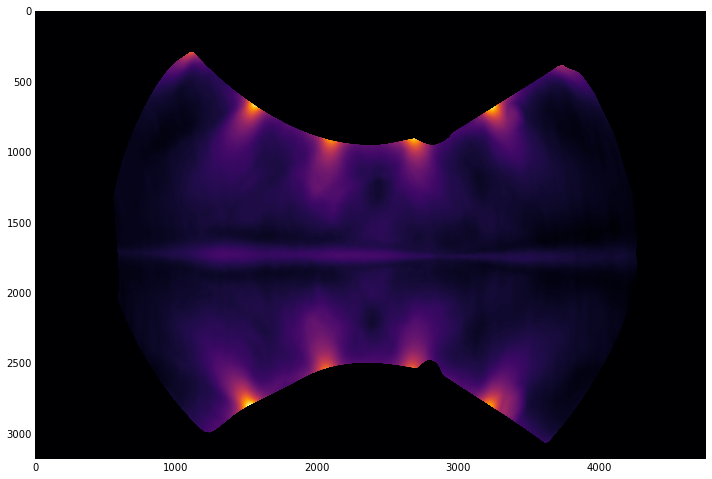

In [5]:
s=s1026_15_532
s.plot_data_px()

In [16]:
s.set_origin(origin=(2880,2348), extent=[-1,12,-3,3])

<IPython.core.display.Javascript object>


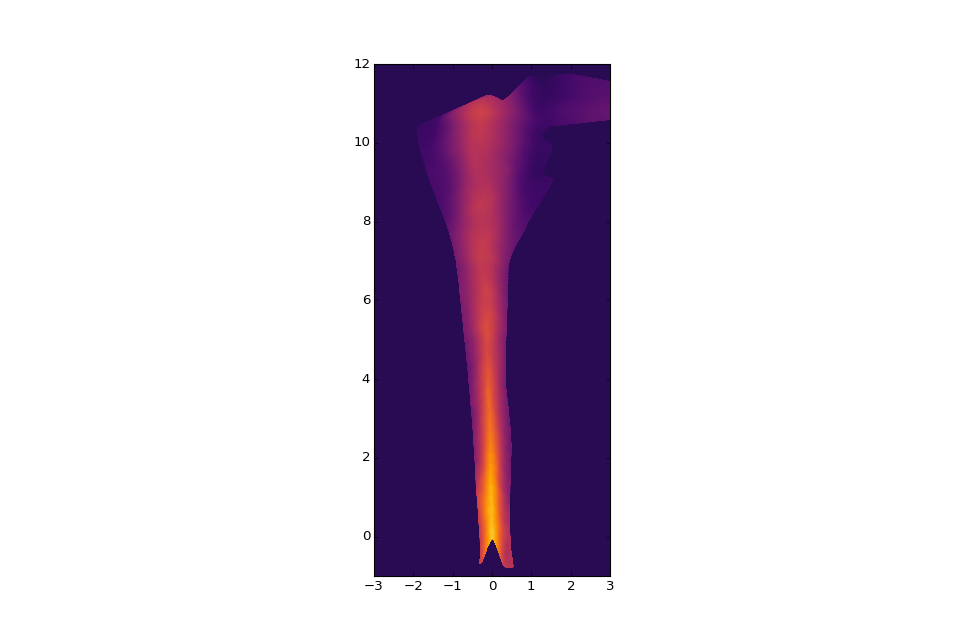

In [17]:
s.plot_data_mm()

In [18]:
s.create_lineout(start=(-1,0),end=(12,0), lineout_width=50)

(0, 522) (2262, 522)


<IPython.core.display.Javascript object>


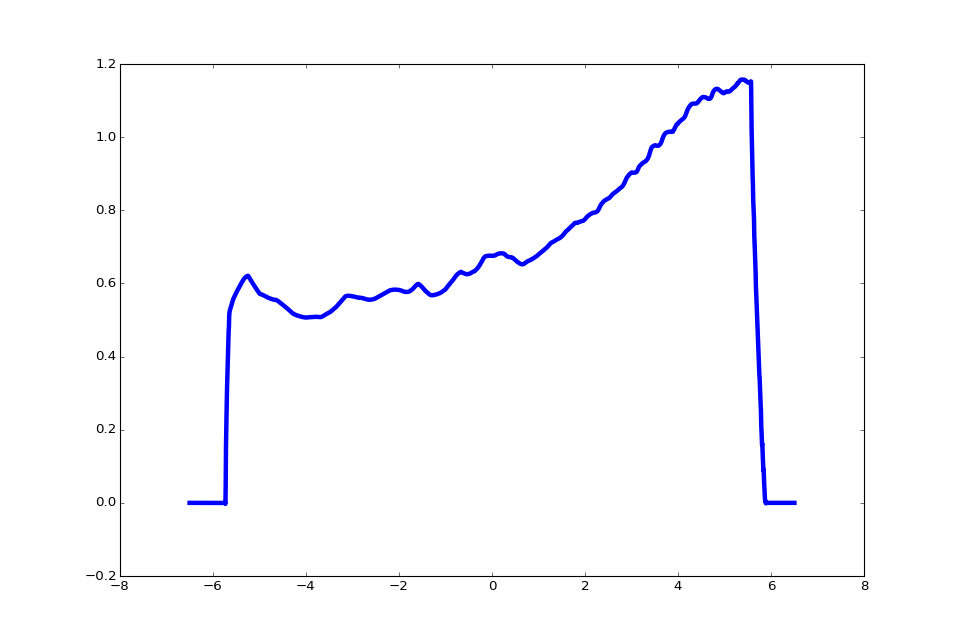

In [20]:
s.plot_lineout(multiply_by=1e-18)

In [9]:
fn="s1026_15 pin positions.txt"
f=[]
xx=[]
yy=[]
with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        f.append(int(row[0]))
        xx.append(int(row[1]))
        yy.append(int(row[2]))
        
xm, xc=np.polyfit(f,xx, 1)
ym, yc=np.polyfit(f, yy, 1)
scale=1 #useful if pin positions taken at different scale to shot
y=lambda f: scale*int(f*ym+yc)
x=lambda f: scale*int(f*xm+xc)

In [10]:
y(1)

1515

<IPython.core.display.Javascript object>


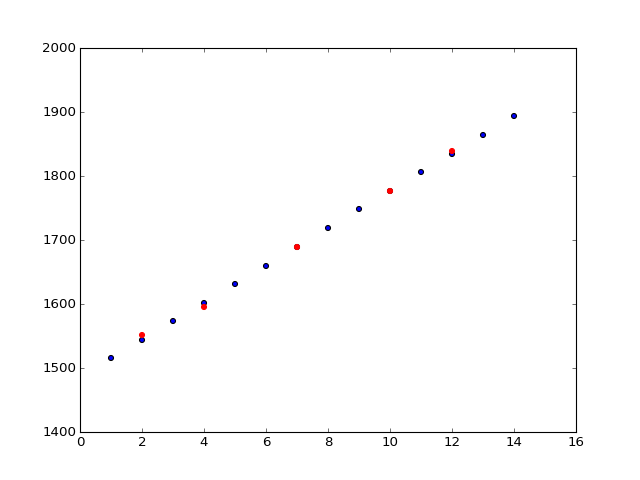

In [28]:
fig,ax=plt.subplots()
ff=range(1,15)
ax.scatter(ff, [y(i) for i in ff])
ax.scatter(f, yy, color='red')

#ax.scatter(ff, [x(i) for i in ff])
#ax.scatter(f, xx, color='red')

In [30]:
y(9)

1748

In [16]:
def average_over_square(array, centre, size):
    square=array[centre[0]-size:centre[0]+size, centre[1]-size:centre[1]+size]
    return np.mean(square)

In [20]:
n_e=[]
M=0.83 #magnification from lab book
spot_size=0.1/M#spot_size in mm
size=int(s.scale*spot_size/(np.sqrt(2)))#in pixels, largest square that can fit inside spot
for i in range(1,15):
    n_e.append(average_over_square(s.data, centre=[y(i), x(i)], size=size))

In [11]:
import csv
filename='s1026_15 n_e at fibres'

data=zip(range(1,15), n_e)
    
with open(filename+'.txt', 'w', newline='') as file:
    cwriter = csv.writer(file, delimiter=',')
    cwriter.writerow(['Fibre', 'n_e'])
    for f in data:
        cwriter.writerow(f)

NameError: name 'n_e' is not defined

In [12]:
fn="s1026_15 velocities.dat"
f=[]
vx=[]
vy=[]
with open(fn, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        f.append(float(row[0]))
        vx.append(float(row[1]))
        vy.append(float(row[2]))

<IPython.core.display.Javascript object>


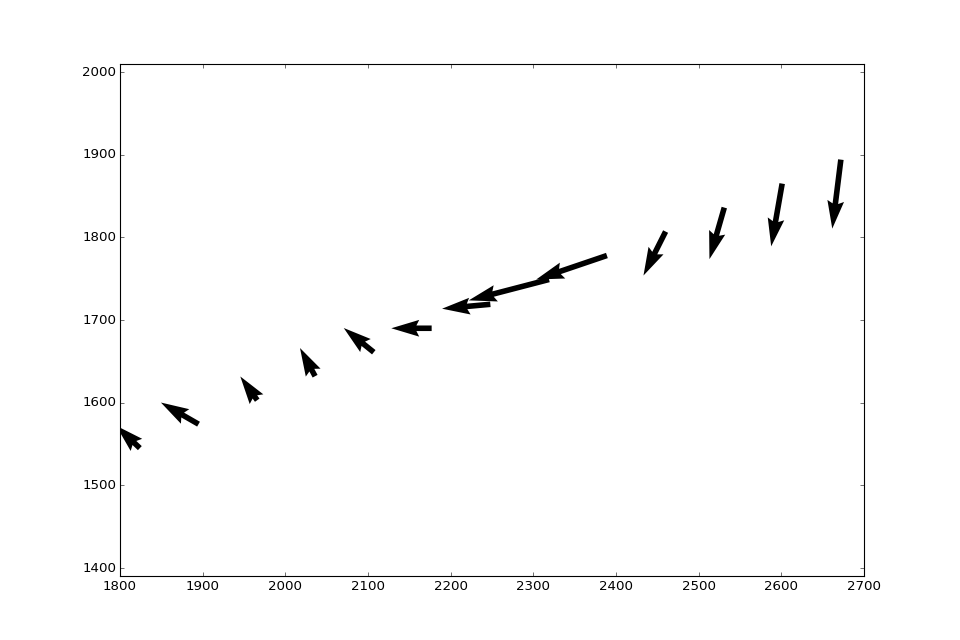

In [39]:
yy=[y(i)-30 for i in f]
xx=[x(i) for i in f]


fig,ax=plt.subplots(figsize=(12,8))
plt.axis('equal')
ax.quiver(xx,yy,np.array(vy),np.array(vx),scale=500, units='xy')

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


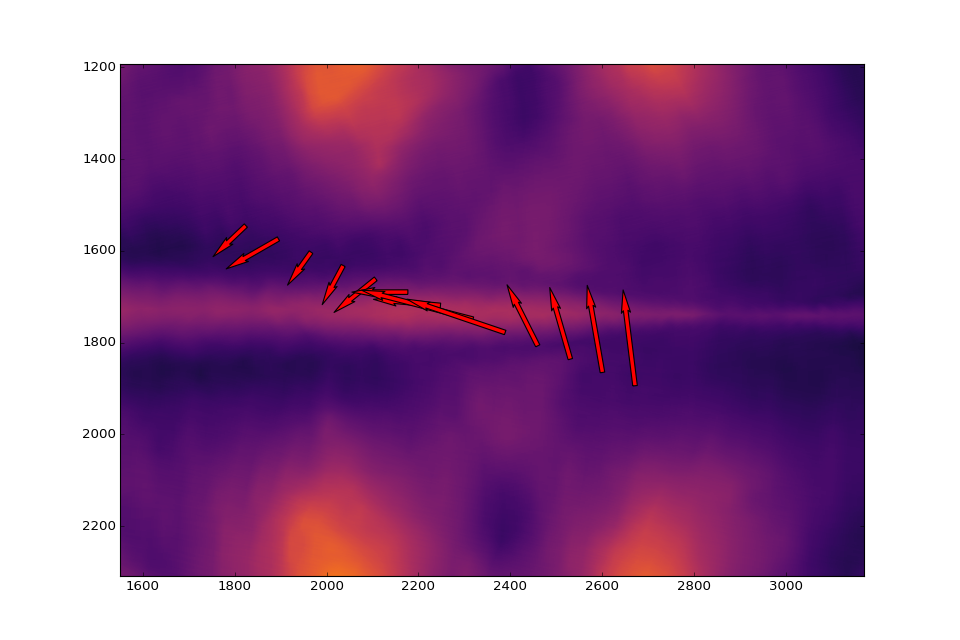

(1800, 2700)

In [45]:
yy=[y(i)+30 for i in f]
xx=[x(i) for i in f]

fig,ax=plt.subplots(figsize=(12,8))
s.plot_data_px(ax=ax, clim=[0,2], multiply_by=1e-18)
plt.axis('equal')
ax.quiver(xx,yy,np.array(vy),-np.array(vx),scale=200, units='xy', color='red', width=10, headwidth=2, edgecolor='black', linewidth=1)
#ax.set_ylim([2100,1300])
ax.set_xlim([1800,2700])

In [48]:
vy

[-14313.473791514878,
 -22762.78276710527,
 -10230.51682500406,
 -9126.92215068461,
 -18168.089129995857,
 -24407.2385961782,
 -29194.712787647666,
 -48555.86258726242,
 -42801.66321619044,
 -13381.845883186334,
 -8979.667255973869,
 -6635.956849936463,
 -5196.665956693742]